# Bosonic SU2, Lambda = 2: Results processing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_last_val(df):
    val_list = []
    name_list = []
    for i in range(len(df.columns)):
        lv = df[df.columns[i]].dropna().to_numpy()[-1]
        val_list.append(np.round(lv,5))
        name_list.append(df.columns[i])
    return name_list, val_list

def plot_e(df, ax):
    for i in range(len(df.columns)):
        ax.plot(np.arange(len(df[df.columns[i]])),df[df.columns[i]],color = color_list[i], 
                 label=df.columns[i])
        

In [3]:
#Renaming ansatze
su2_ansatz = ['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c',
             'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
tl_ansatz = ['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c',
             'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']

# Coupling = 0.2

In [4]:
E_02 = 3.14808
df_02_cs= pd.read_csv('results/qve_l2_l0.2_effsu2_cobyla.csv')
df_02_ct= pd.read_csv('results/qve_l2_l0.2_twolocal_cobyla.csv')
df_02_ss= pd.read_csv('results/qve_l2_l0.2_effsu2_spsa.csv')
df_02_st= pd.read_csv('results/qve_l2_l0.2_twolocal_spsa.csv')

In [5]:
df_02_cs.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_02_cs.columns = su2_ansatz

df_02_ct.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_02_ct.columns = tl_ansatz

df_02_ss.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_02_ss.columns = su2_ansatz

df_02_st.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_02_st.columns = tl_ansatz

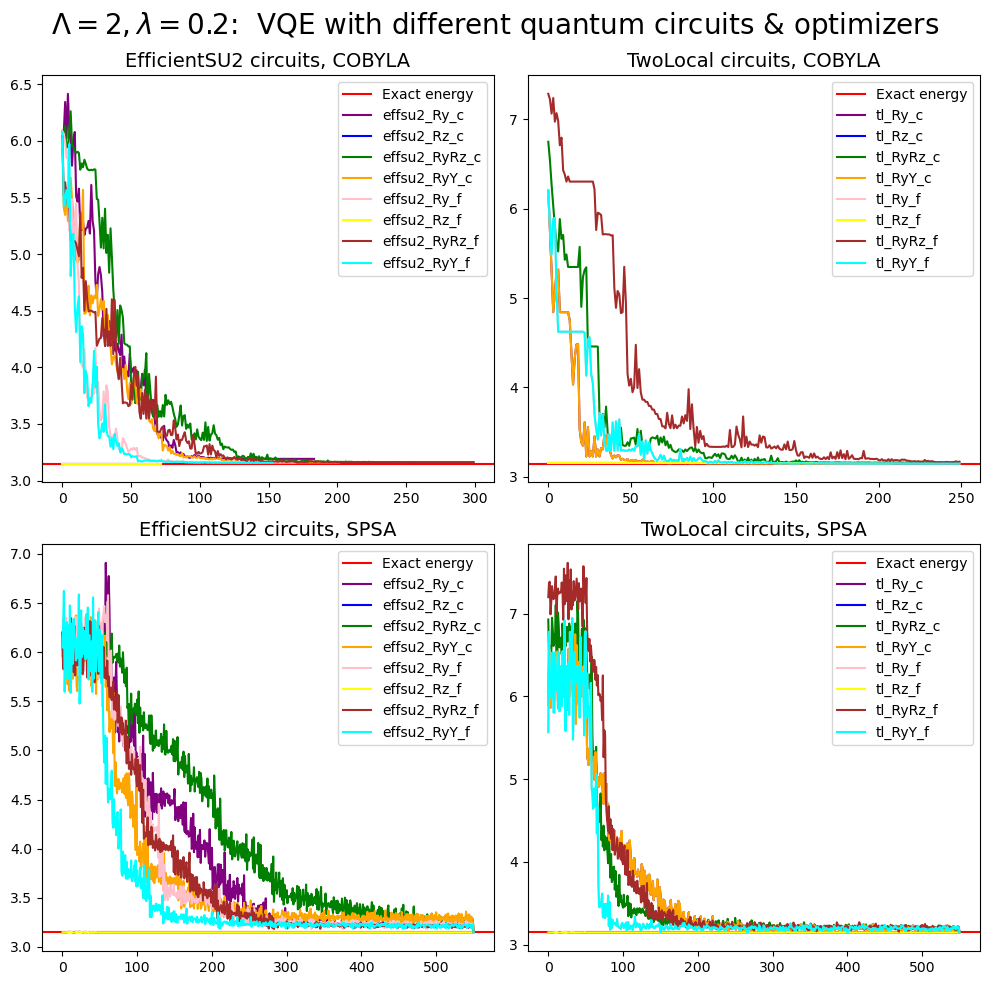

In [6]:
fig, ax = plt.subplots(2,2, figsize=(10,10), tight_layout = True)
color_list = ['purple', 'blue', 'green', 'orange', 'pink', 'yellow', 'brown', 'cyan']

ax[0,0].axhline(E_02, color = 'red',  label = 'Exact energy')
plot_e(df_02_cs, ax[0,0])
#plt.ylim([3.35, 3.4])
ax[0,0].set_title('EfficientSU2 circuits, COBYLA', fontsize = 14)
ax[0,0].legend()

ax[0,1].axhline(E_02, color = 'red',  label = 'Exact energy')
plot_e(df_02_ct, ax[0,1])
#plt.ylim([3.35, 3.4])
ax[0,1].set_title('TwoLocal circuits, COBYLA', fontsize = 14)
ax[0,1].legend()

ax[1,0].axhline(E_02, color = 'red',  label = 'Exact energy')
plot_e(df_02_ss, ax[1,0])
#plt.ylim([3.35, 3.4])
ax[1,0].set_title('EfficientSU2 circuits, SPSA', fontsize = 14)
ax[1,0].legend()

ax[1,1].axhline(E_02, color = 'red',  label = 'Exact energy')
plot_e(df_02_st, ax[1,1])
#plt.ylim([3.35, 3.4])
ax[1,1].set_title('TwoLocal circuits, SPSA', fontsize = 14)
ax[1,1].legend()

plt.suptitle('$\Lambda=2, \lambda=0.2$:  VQE with different quantum circuits & optimizers', fontsize = 20)
plt.savefig('results/L=2_l=0.2_convergence_curves.png')

In [8]:
ns1, vs1 = get_last_val(df_02_cs)
nt1, vt1 = get_last_val(df_02_ct)

ns2, vs2 = get_last_val(df_02_ss)
nt2, vt2 = get_last_val(df_02_st)
print(f'cobyla, effsu2:\n {ns1}\n {vs1}\n')
print(f'cobyla, twolocal: \n{nt1}\n {vt1}\n')
print(f'spsa, effsu2: \n{ns2}\n {vs2}\n')
print(f'spsa, twolocal: \n{nt2}\n {vt2}\n')

cobyla, effsu2:
 ['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [3.19141, 3.1498, 3.15801, 3.15977, 3.15918, 3.1498, 3.16211, 3.15664]

cobyla, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [3.14629, 3.1498, 3.15762, 3.14629, 3.14844, 3.1498, 3.16992, 3.14844]

spsa, effsu2: 
['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [3.15703, 3.1498, 3.16816, 3.16641, 3.15332, 3.1498, 3.15137, 3.15137]

spsa, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [3.14941, 3.1498, 3.15645, 3.14941, 3.1498, 3.1498, 3.15605, 3.1498]



In [9]:
l02_cn = np.concatenate((ns1, nt1), axis = 0)
l02_cv = np.concatenate((vs1, vt1), axis = 0)
l02_sn = np.concatenate((ns2, nt2), axis = 0)
l02_sv = np.concatenate((vs2, vt2), axis = 0)

df_l02 = pd.DataFrame({'name': l02_cn, 'cobyla_values': l02_cv, 'spsa_values': l02_sv})
df_l02.set_index('name', inplace = True)

df_l02.to_csv('results/l0.2_last_val.csv')
df_l02

,cobyla_values,spsa_values
name,,
effsu2_Ry_c,3.19141,3.15703
effsu2_Rz_c,3.14980,3.14980
effsu2_RyRz_c,3.15801,3.16816
effsu2_RyY_c,3.15977,3.16641
effsu2_Ry_f,3.15918,3.15332
effsu2_Rz_f,3.14980,3.14980
effsu2_RyRz_f,3.16211,3.15137
effsu2_RyY_f,3.15664,3.15137
tl_Ry_c,3.14629,3.14941


# Coupling = 0.5

In [8]:
E_05 = 3.3625
df_05_cs= pd.read_csv('results/qve_l2_l0.5_effsu2_cobyla.csv')
df_05_ct= pd.read_csv('results/qve_l2_l0.5_twolocal_cobyla.csv')
df_05_ss= pd.read_csv('results/qve_l2_l0.5_effsu2_spsa.csv')
df_05_st= pd.read_csv('results/qve_l2_l0.5_twolocal_spsa.csv')

In [9]:
df_05_cs.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_05_cs.columns = su2_ansatz

df_05_ct.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_05_ct.columns = tl_ansatz

df_05_ss.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_05_ss.columns = su2_ansatz

df_05_st.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_05_st.columns = tl_ansatz

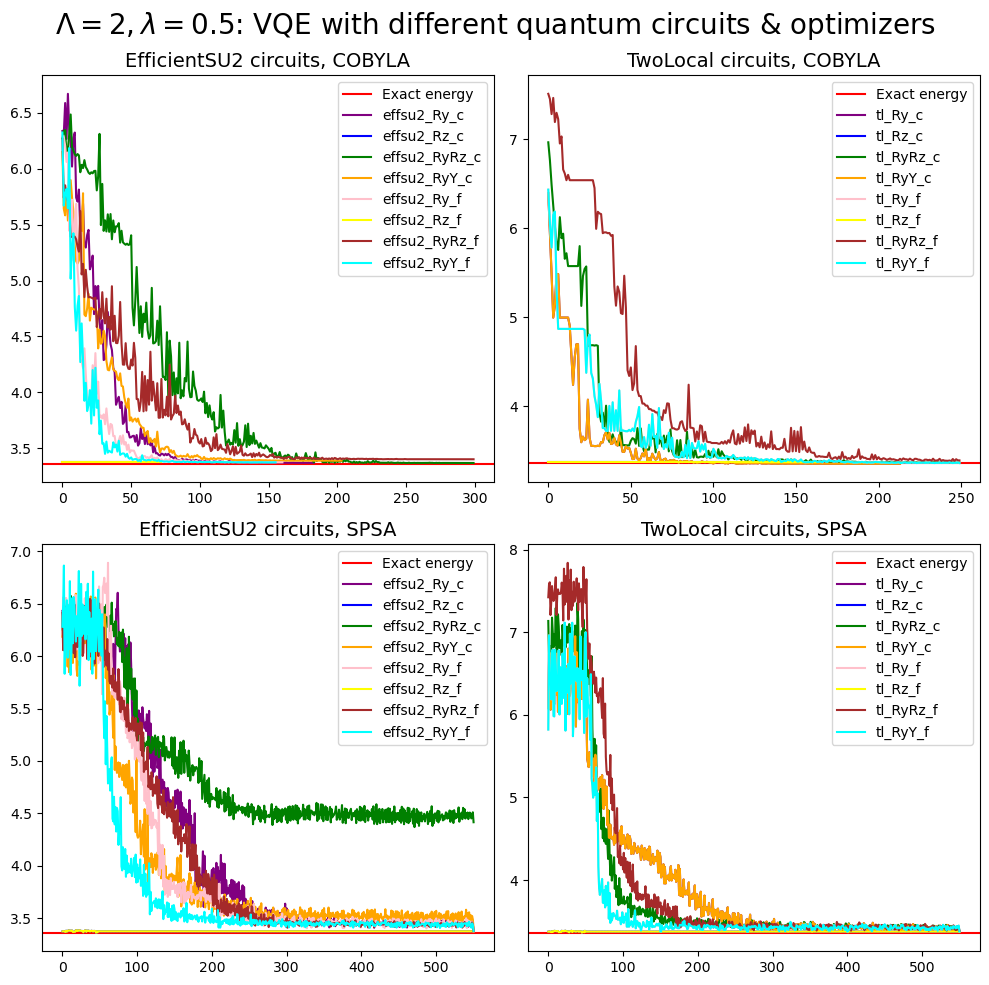

In [10]:
fig, ax = plt.subplots(2,2, figsize=(10,10), tight_layout = True)
color_list = ['purple', 'blue', 'green', 'orange', 'pink', 'yellow', 'brown', 'cyan']

ax[0,0].axhline(E_05, color = 'red',  label = 'Exact energy')
plot_e(df_05_cs, ax[0,0])
#plt.ylim([3.35, 3.4])
ax[0,0].set_title('EfficientSU2 circuits, COBYLA', fontsize = 14)
ax[0,0].legend()

ax[0,1].axhline(E_05, color = 'red',  label = 'Exact energy')
plot_e(df_05_ct, ax[0,1])
#plt.ylim([3.35, 3.4])
ax[0,1].set_title('TwoLocal circuits, COBYLA', fontsize = 14)
ax[0,1].legend()

ax[1,0].axhline(E_05, color = 'red',  label = 'Exact energy')
plot_e(df_05_ss, ax[1,0])
#plt.ylim([3.35, 3.4])
ax[1,0].set_title('EfficientSU2 circuits, SPSA',fontsize = 14)
ax[1,0].legend()

ax[1,1].axhline(E_05, color = 'red',  label = 'Exact energy')
plot_e(df_05_st, ax[1,1])
#plt.ylim([3.35, 3.4])
ax[1,1].set_title('TwoLocal circuits, SPSA', fontsize = 14)
ax[1,1].legend()

plt.suptitle('$\Lambda=2, \lambda=0.5$: VQE with different quantum circuits & optimizers', fontsize = 20)
plt.savefig('results/L=2_l=0.5_convergence_curves.png')

In [13]:
ns1, vs1 = get_last_val(df_05_cs)
nt1, vt1 = get_last_val(df_05_ct)
ns2, vs2 = get_last_val(df_05_ss)
nt2, vt2 = get_last_val(df_05_st)
print(f'cobyla, effsu2:\n {ns1}\n {vs1}\n')
print(f'cobyla, twolocal: \n{nt1}\n {vt1}\n')
print(f'spsa, effsu2: \n{ns2}\n {vs2}\n')
print(f'spsa, twolocal: \n{nt2}\n {vt2}\n')

cobyla, effsu2:
 ['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [3.37158, 3.37451, 3.36963, 3.39014, 3.37549, 3.37451, 3.40283, 3.37549]

cobyla, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [3.35742, 3.37451, 3.37012, 3.35742, 3.36523, 3.37451, 3.39502, 3.36523]

spsa, effsu2: 
['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [3.38623, 3.37451, 4.41553, 3.40088, 3.37305, 3.37451, 3.37646, 3.37891]

spsa, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [3.37207, 3.37451, 3.37939, 3.37207, 3.37646, 3.37451, 3.38379, 3.37646]



In [14]:
l05_cn = np.concatenate((ns1, nt1), axis = 0)
l05_cv = np.concatenate((vs1, vt1), axis = 0)
l05_sn = np.concatenate((ns2, nt2), axis = 0)
l05_sv = np.concatenate((vs2, vt2), axis = 0)

df_l05 = pd.DataFrame({'name': l05_cn, 'cobyla_values': l05_cv, 'spsa_values': l05_sv})
df_l05.set_index('name', inplace = True)

df_l05.to_csv('results/l0.5_last_val.csv')
df_l05

,cobyla_values,spsa_values
name,,
effsu2_Ry_c,3.37158,3.38623
effsu2_Rz_c,3.37451,3.37451
effsu2_RyRz_c,3.36963,4.41553
effsu2_RyY_c,3.39014,3.40088
effsu2_Ry_f,3.37549,3.37305
effsu2_Rz_f,3.37451,3.37451
effsu2_RyRz_f,3.40283,3.37646
effsu2_RyY_f,3.37549,3.37891
tl_Ry_c,3.35742,3.37207


# Coupling = 1.0

In [11]:
E_10 = 3.69722
df_10_cs= pd.read_csv('results/qve_l2_l1.0_effsu2_cobyla.csv')
df_10_ct= pd.read_csv('results/qve_l2_l1.0_twolocal_cobyla.csv')
df_10_ss= pd.read_csv('results/qve_l2_l1.0_effsu2_spsa.csv')
df_10_st= pd.read_csv('results/qve_l2_l1.0_twolocal_spsa.csv')

In [12]:
df_10_cs.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_10_cs.columns = su2_ansatz

df_10_ct.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_10_ct.columns = tl_ansatz

df_10_ss.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_10_ss.columns = su2_ansatz

df_10_st.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_10_st.columns = tl_ansatz

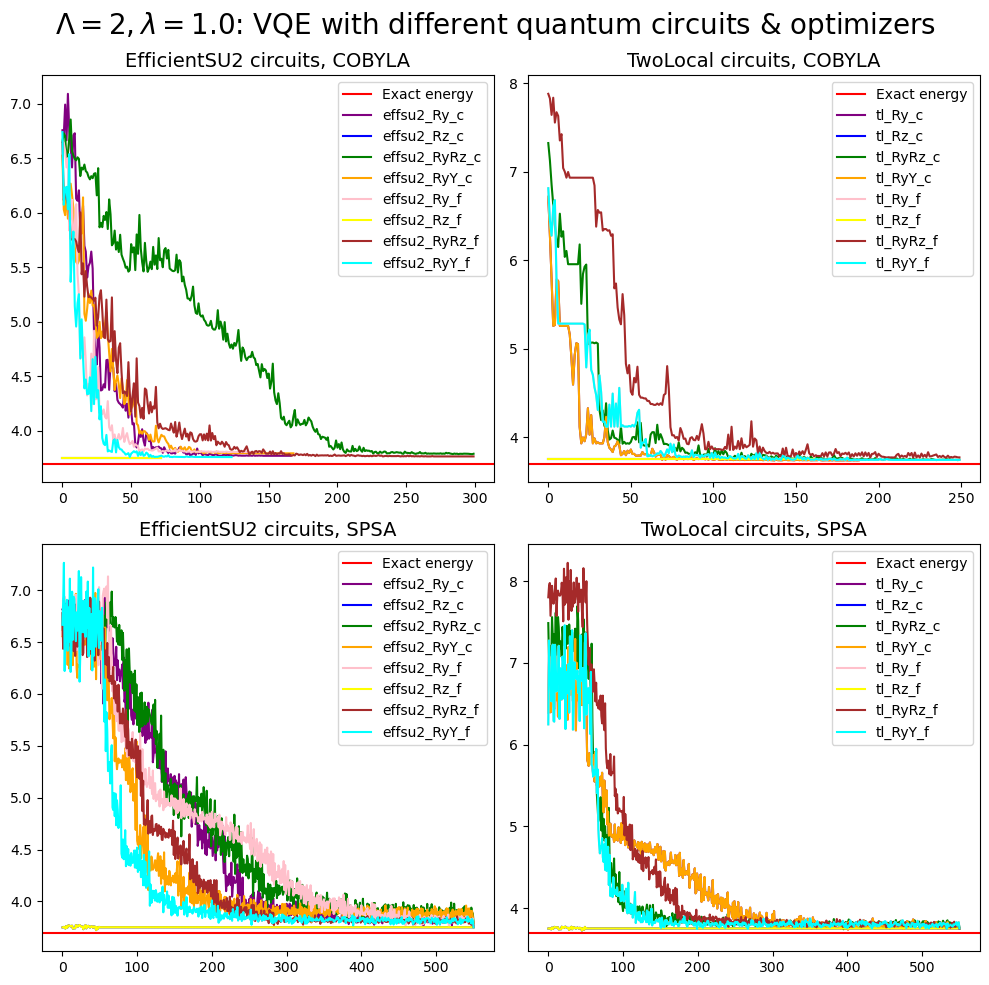

In [13]:
fig, ax = plt.subplots(2,2, figsize=(10,10), tight_layout = True)
color_list = ['purple', 'blue', 'green', 'orange', 'pink', 'yellow', 'brown', 'cyan']

ax[0,0].axhline(E_10, color = 'red',  label = 'Exact energy')
plot_e(df_10_cs, ax[0,0])
#plt.ylim([3.35, 3.4])
ax[0,0].set_title('EfficientSU2 circuits, COBYLA', fontsize = 14)
ax[0,0].legend()

ax[0,1].axhline(E_10, color = 'red',  label = 'Exact energy')
plot_e(df_10_ct, ax[0,1])
#plt.ylim([3.35, 3.4])
ax[0,1].set_title('TwoLocal circuits, COBYLA', fontsize = 14)
ax[0,1].legend()

ax[1,0].axhline(E_10, color = 'red',  label = 'Exact energy')
plot_e(df_10_ss, ax[1,0])
#plt.ylim([3.35, 3.4])
ax[1,0].set_title('EfficientSU2 circuits, SPSA', fontsize = 14)
ax[1,0].legend()

ax[1,1].axhline(E_10, color = 'red',  label = 'Exact energy')
plot_e(df_10_st, ax[1,1])
#plt.ylim([3.35, 3.4])
ax[1,1].set_title('TwoLocal circuits, SPSA', fontsize = 14)
ax[1,1].legend()

plt.suptitle('$\Lambda=2, \lambda=1.0$: VQE with different quantum circuits & optimizers', fontsize = 20)
plt.savefig('results/L=2_l=1.0_convergence_curves.png')

In [18]:
ns1, vs1 = get_last_val(df_10_cs)
nt1, vt1 = get_last_val(df_10_ct)
ns2, vs2 = get_last_val(df_10_ss)
nt2, vt2 = get_last_val(df_10_st)
print(f'cobyla, effsu2:\n {ns1}\n {vs1}\n')
print(f'cobyla, twolocal: \n{nt1}\n {vt1}\n')
print(f'spsa, effsu2: \n{ns2}\n {vs2}\n')
print(f'spsa, twolocal: \n{nt2}\n {vt2}\n')

cobyla, effsu2:
 ['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [3.77051, 3.74902, 3.78906, 3.79297, 3.80469, 3.74902, 3.76465, 3.75879]

cobyla, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [3.7373, 3.74902, 3.74414, 3.7373, 3.74121, 3.74902, 3.76953, 3.74121]

spsa, effsu2: 
['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [3.76953, 3.74902, 3.79199, 3.77832, 3.74316, 3.74902, 3.75098, 3.74902]

spsa, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [3.75098, 3.74902, 3.75293, 3.75098, 3.75195, 3.74902, 3.74707, 3.75195]



In [19]:
l10_cn = np.concatenate((ns1, nt1), axis = 0)
l10_cv = np.concatenate((vs1, vt1), axis = 0)
l10_sn = np.concatenate((ns2, nt2), axis = 0)
l10_sv = np.concatenate((vs2, vt2), axis = 0)

df_l10 = pd.DataFrame({'name': l10_cn, 'cobyla_values': l10_cv, 'spsa_values': l10_sv})
df_l10.set_index('name', inplace = True)

df_l10.to_csv('results/l1.0_last_val.csv')
df_l10

,cobyla_values,spsa_values
name,,
effsu2_Ry_c,3.77051,3.76953
effsu2_Rz_c,3.74902,3.74902
effsu2_RyRz_c,3.78906,3.79199
effsu2_RyY_c,3.79297,3.77832
effsu2_Ry_f,3.80469,3.74316
effsu2_Rz_f,3.74902,3.74902
effsu2_RyRz_f,3.76465,3.75098
effsu2_RyY_f,3.75879,3.74902
tl_Ry_c,3.73730,3.75098


# Coupling =2.0

In [14]:
E_20 = 4.26795

df_20_cs= pd.read_csv('results/qve_l2_l2.0_effsu2_cobyla.csv')
df_20_ct= pd.read_csv('results/qve_l2_l2.0_twolocal_cobyla.csv')
df_20_ss= pd.read_csv('results/qve_l2_l2.0_effsu2_spsa.csv')
df_20_st= pd.read_csv('results/qve_l2_l2.0_twolocal_spsa.csv')

In [15]:
df_20_cs.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20_cs.columns = su2_ansatz

df_20_ct.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20_ct.columns = tl_ansatz

df_20_ss.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20_ss.columns = su2_ansatz

df_20_st.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20_st.columns = tl_ansatz

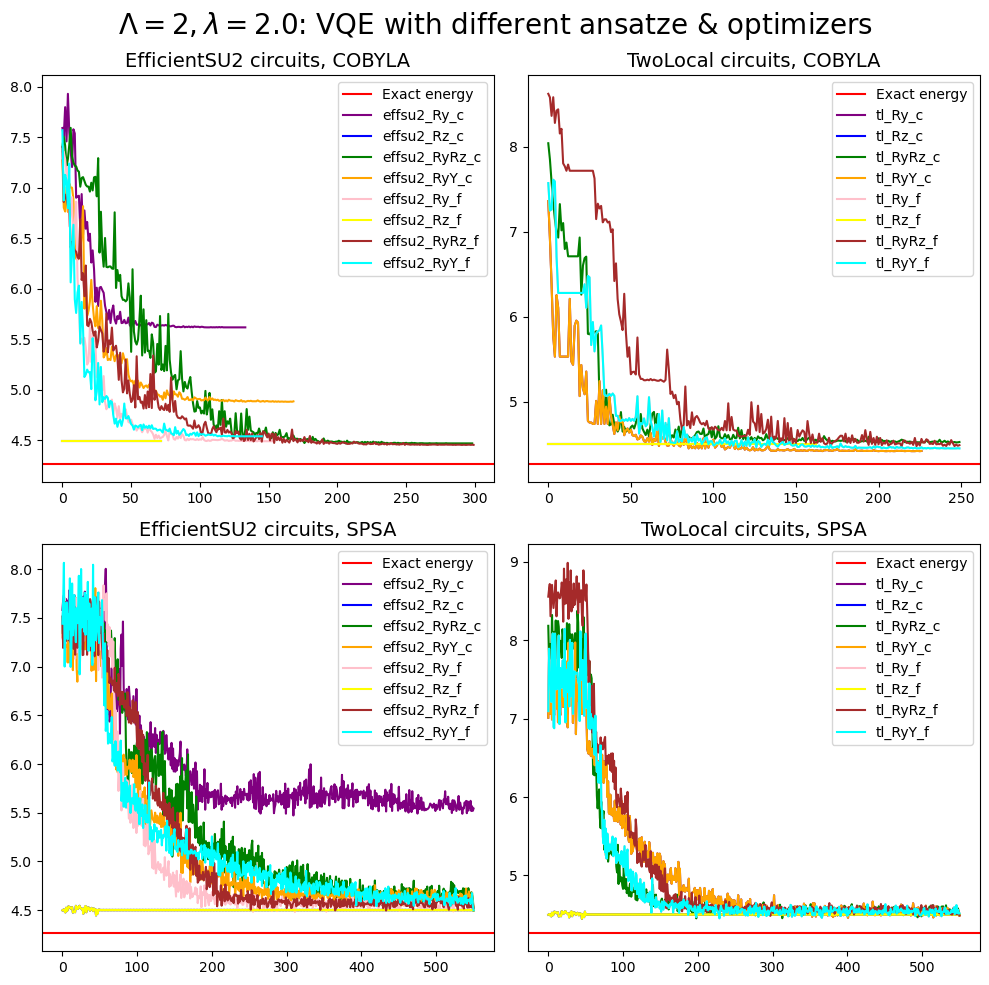

In [17]:
fig, ax = plt.subplots(2,2, figsize=(10,10), tight_layout = True)
color_list = ['purple', 'blue', 'green', 'orange', 'pink', 'yellow', 'brown', 'cyan']

ax[0,0].axhline(E_20, color = 'red',  label = 'Exact energy')
plot_e(df_20_cs, ax[0,0])
#plt.ylim([3.35, 3.4])
ax[0,0].set_title('EfficientSU2 circuits, COBYLA', fontsize = 14)
ax[0,0].legend()

ax[0,1].axhline(E_20, color = 'red',  label = 'Exact energy')
plot_e(df_20_ct, ax[0,1])
#plt.ylim([3.35, 3.4])
ax[0,1].set_title('TwoLocal circuits, COBYLA', fontsize = 14)
ax[0,1].legend()

ax[1,0].axhline(E_20, color = 'red',  label = 'Exact energy')
plot_e(df_20_ss, ax[1,0])
#plt.ylim([3.35, 3.4])
ax[1,0].set_title('EfficientSU2 circuits, SPSA', fontsize = 14)
ax[1,0].legend()

ax[1,1].axhline(E_20, color = 'red',  label = 'Exact energy')
plot_e(df_20_st, ax[1,1])
#plt.ylim([3.35, 3.4])
ax[1,1].set_title('TwoLocal circuits, SPSA', fontsize = 14)
ax[1,1].legend()

plt.suptitle('$\Lambda=2, \lambda=2.0$: VQE with different ansatze & optimizers', fontsize = 20)
plt.savefig('results/L=2_l=2.0_convergence_curves.png')

In [21]:
ns1, vs1 = get_last_val(df_20_cs)
nt1, vt1 = get_last_val(df_20_ct)
ns2, vs2 = get_last_val(df_20_ss)
nt2, vt2 = get_last_val(df_20_st)
print(f'cobyla, effsu2:\n {ns1}\n {vs1}\n')
print(f'cobyla, twolocal: \n{nt1}\n {vt1}\n')
print(f'spsa, effsu2: \n{ns2}\n {vs2}\n')
print(f'spsa, twolocal: \n{nt2}\n {vt2}\n')

cobyla, effsu2:
 ['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [5.61816, 4.49805, 4.46973, 4.88574, 4.49121, 4.49805, 4.45508, 4.54004]

cobyla, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [4.41895, 4.49805, 4.52441, 4.41895, 4.44922, 4.49805, 4.4873, 4.44922]

spsa, effsu2: 
['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [5.54297, 4.49805, 4.49609, 4.52148, 4.51172, 4.49805, 4.52051, 4.50098]

spsa, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [4.48535, 4.49805, 4.50684, 4.48535, 4.51562, 4.49805, 4.49121, 4.51562]



In [24]:
l20_cn = np.concatenate((ns1, nt1), axis = 0)
l20_cv = np.concatenate((vs1, vt1), axis = 0)
l20_sn = np.concatenate((ns2, nt2), axis = 0)
l20_sv = np.concatenate((vs2, vt2), axis = 0)

df_l20 = pd.DataFrame({'name': l20_cn, 'cobyla_values': l20_cv, 'spsa_values': l20_sv})
df_l20.set_index('name', inplace = True)

df_l20.to_csv('results/l2.0_last_val.csv')
df_l20

,cobyla_values,spsa_values
name,,
effsu2_Ry_c,5.61816,5.54297
effsu2_Rz_c,4.49805,4.49805
effsu2_RyRz_c,4.46973,4.49609
effsu2_RyY_c,4.88574,4.52148
effsu2_Ry_f,4.49121,4.51172
effsu2_Rz_f,4.49805,4.49805
effsu2_RyRz_f,4.45508,4.52051
effsu2_RyY_f,4.54004,4.50098
tl_Ry_c,4.41895,4.48535


# Coupling = 2.0: Multifold circuits

In [18]:
df_20_cs_2f= pd.read_csv('results/qve_l2_l2.0_effsu2_2f_cobyla.csv')
df_20_ct_2f= pd.read_csv('results/qve_l2_l2.0_twolocal_2f_cobyla.csv')
df_20_ss_2f= pd.read_csv('results/qve_l2_l2.0_effsu2_2f_spsa.csv')
df_20_st_2f= pd.read_csv('results/qve_l2_l2.0_twolocal_2f_spsa.csv')

df_20_cs_3f= pd.read_csv('results/qve_l2_l2.0_effsu2_3f_cobyla.csv')
df_20_ct_3f= pd.read_csv('results/qve_l2_l2.0_twolocal_3f_cobyla.csv')
df_20_ss_3f= pd.read_csv('results/qve_l2_l2.0_effsu2_3f_spsa.csv')
df_20_st_3f= pd.read_csv('results/qve_l2_l2.0_twolocal_3f_spsa.csv')

In [19]:
df_20_cs_2f.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20_cs_2f.columns = su2_ansatz

df_20_ct_2f.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20_ct_2f.columns = tl_ansatz

df_20_ss_2f.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20_ss_2f.columns = su2_ansatz

df_20_st_2f.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20_st_2f.columns = tl_ansatz

df_20_cs_3f.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20_cs_3f.columns = su2_ansatz

df_20_ct_3f.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20_ct_3f.columns = tl_ansatz

df_20_ss_3f.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20_ss_3f.columns = su2_ansatz

df_20_st_3f.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20_st_3f.columns = tl_ansatz

In [22]:
ns1_2f, vs1_2f = get_last_val(df_20_cs_2f)
nt1_2f, vt1_2f = get_last_val(df_20_ct_2f)
ns2_2f, vs2_2f = get_last_val(df_20_ss_2f)
nt2_2f, vt2_2f = get_last_val(df_20_st_2f)
print(f'cobyla, effsu2:\n {ns1_2f}\n {vs1_2f}\n')
print(f'cobyla, twolocal: \n{nt1_2f}\n {vt1_2f}\n')
print(f'spsa, effsu2: \n{ns2_2f}\n {vs2_2f}\n')
print(f'spsa, twolocal: \n{nt2_2f}\n {vt2_2f}\n')

cobyla, effsu2:
 ['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [4.46875, 4.49805, 4.61621, 5.46875, 5.52246, 4.49805, 4.57715, 5.06152]

cobyla, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [4.46094, 4.49805, 4.51172, 4.4082, 4.52344, 4.49805, 4.57812, 4.50684]

spsa, effsu2: 
['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [4.60547, 4.49805, 4.53125, 4.53418, 4.52051, 4.49805, 4.48828, 4.54102]

spsa, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [4.49219, 4.49805, 4.51855, 4.4834, 4.47656, 4.49805, 4.5166, 4.50977]



In [23]:
l20_cn_2f = np.concatenate((ns1, nt1), axis = 0)
l20_cv_2f = np.concatenate((vs1_2f, vt1_2f), axis = 0)
l20_sn_2f = np.concatenate((ns2_2f, nt2_2f), axis = 0)
l20_sv_2f = np.concatenate((vs2_2f, vt2_2f), axis = 0)

df_l20_2f = pd.DataFrame({'name': l20_cn_2f, 'cobyla_values': l20_cv_2f, 'spsa_values': l20_sv_2f})
df_l20_2f.set_index('name', inplace = True)

df_l20_2f.to_csv('results/l2.0_2f_last_val.csv')
df_l20_2f

,cobyla_values,spsa_values
name,,
effsu2_Ry_c,4.46875,4.60547
effsu2_Rz_c,4.49805,4.49805
effsu2_RyRz_c,4.61621,4.53125
effsu2_RyY_c,5.46875,4.53418
effsu2_Ry_f,5.52246,4.52051
effsu2_Rz_f,4.49805,4.49805
effsu2_RyRz_f,4.57715,4.48828
effsu2_RyY_f,5.06152,4.54102
tl_Ry_c,4.46094,4.49219


In [24]:
ns1_3f, vs1_3f = get_last_val(df_20_cs_3f)
nt1_3f, vt1_3f = get_last_val(df_20_ct_3f)
ns2_3f, vs2_3f = get_last_val(df_20_ss_3f)
nt2_3f, vt2_3f = get_last_val(df_20_st_3f)
print(f'cobyla, effsu2:\n {ns1_3f}\n {vs1_3f}\n')
print(f'cobyla, twolocal: \n{nt1_3f}\n {vt1_3f}\n')
print(f'spsa, effsu2: \n{ns2_3f}\n {vs2_3f}\n')
print(f'spsa, twolocal: \n{nt2_3f}\n {vt2_3f}\n')

cobyla, effsu2:
 ['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [5.45703, 4.49805, 5.93848, 5.01367, 4.67676, 4.49805, 4.88281, 4.64258]

cobyla, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [4.44531, 4.49805, 4.47852, 4.44531, 4.48242, 4.49805, 4.53027, 4.48242]

spsa, effsu2: 
['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [5.30566, 4.49805, 5.97559, 5.40137, 4.51562, 4.49805, 4.5957, 4.50293]

spsa, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [4.51562, 4.49805, 4.51855, 4.51562, 4.50391, 4.49805, 4.49609, 4.50391]



In [25]:
l20_cn_3f = np.concatenate((ns1, nt1), axis = 0)
l20_cv_3f = np.concatenate((vs1_3f, vt1_3f), axis = 0)
l20_sn_3f = np.concatenate((ns2_3f, nt2_3f), axis = 0)
l20_sv_3f = np.concatenate((vs2_3f, vt2_3f), axis = 0)

df_l20_3f = pd.DataFrame({'name': l20_cn_3f, 'cobyla_values': l20_cv_3f, 'spsa_values': l20_sv_3f})
df_l20_3f.set_index('name', inplace = True)

df_l20_3f.to_csv('results/l2.0_3f_last_val.csv')
df_l20_3f

,cobyla_values,spsa_values
name,,
effsu2_Ry_c,5.45703,5.30566
effsu2_Rz_c,4.49805,4.49805
effsu2_RyRz_c,5.93848,5.97559
effsu2_RyY_c,5.01367,5.40137
effsu2_Ry_f,4.67676,4.51562
effsu2_Rz_f,4.49805,4.49805
effsu2_RyRz_f,4.88281,4.59570
effsu2_RyY_f,4.64258,4.50293
tl_Ry_c,4.44531,4.51562


# Plot all results

In [26]:
E_02 = 3.14808
E_05 = 3.3625
E_10 = 3.69722
E_20 = 4.26795

In [27]:
df_l02 = pd.read_csv('results/l0.2_last_val.csv')
df_l05 = pd.read_csv('results/l0.5_last_val.csv')
df_l10 = pd.read_csv('results/l1.0_last_val.csv')
df_l20 = pd.read_csv('results/l2.0_last_val.csv')
#df_l20_2f = pd.read_csv('results/l2.0_2f_last_val.csv')
df_l02.set_index('name', inplace = True)
df_l05.set_index('name', inplace = True)
df_l10.set_index('name', inplace = True)
df_l20.set_index('name', inplace = True)
#df_l20_2f.set_index('name', inplace = True)

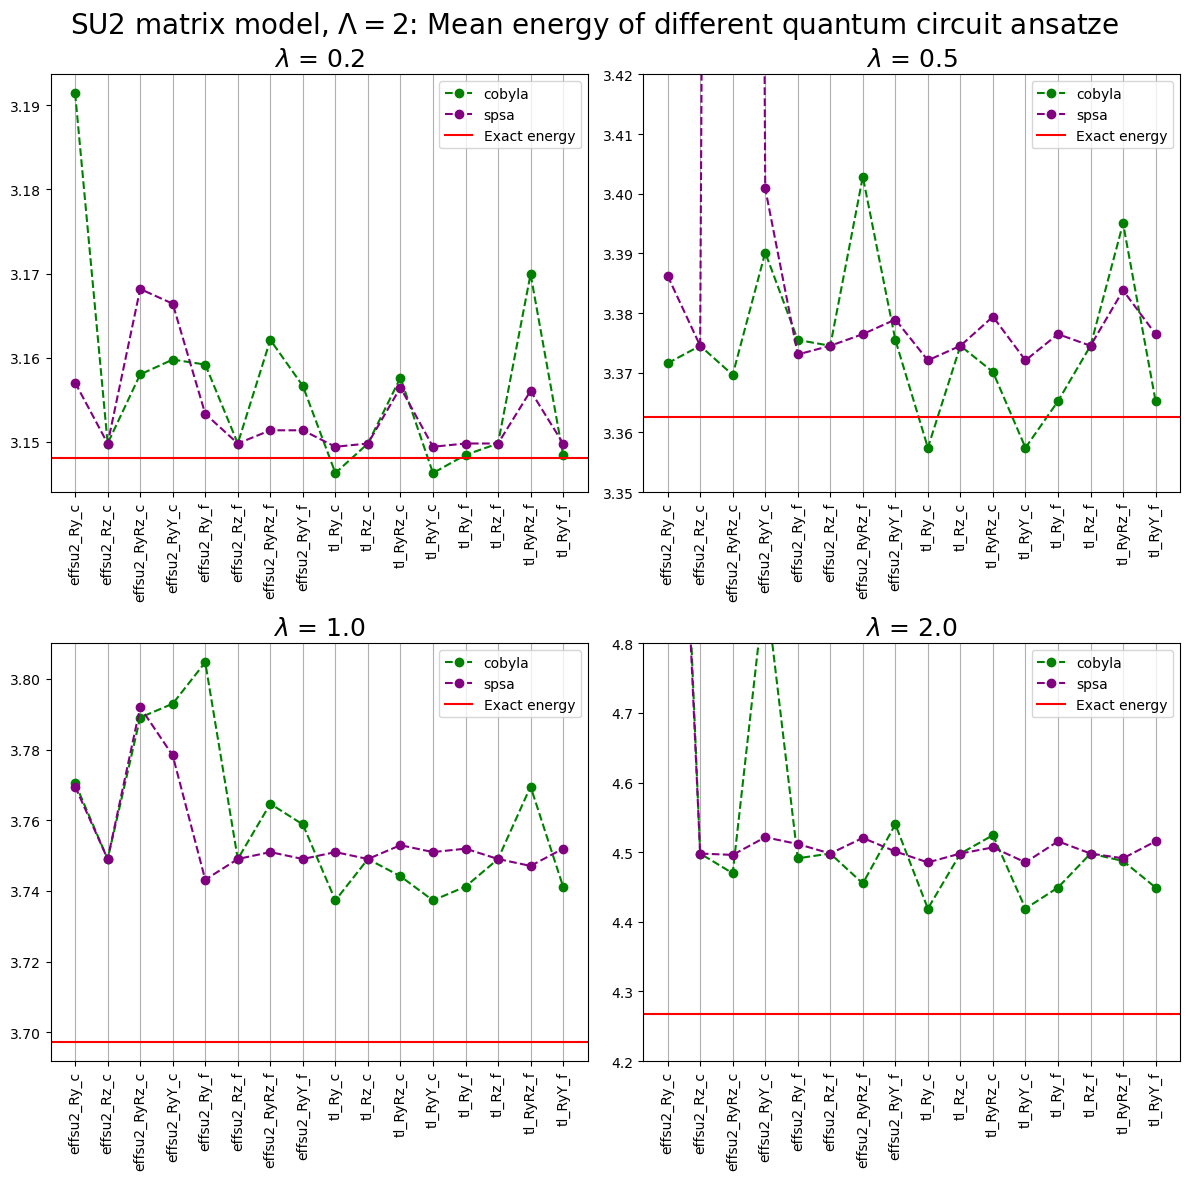

In [30]:
fig, ax = plt.subplots(2,2, figsize = (12,12), tight_layout= True)
ax[0,0].plot(df_l02['cobyla_values'], color='green', marker='o', linestyle='dashed', label='cobyla')
ax[0,0].plot(df_l02['spsa_values'], color='purple', marker='o', linestyle='dashed', label = 'spsa')
ax[0,0].axhline(E_02, color = 'red', label='Exact energy')
for tick in ax[0,0].get_xticklabels():
    tick.set_rotation(90)
ax[0,0].set_title('$\lambda$ = 0.2', fontsize = 18)
ax[0,0].legend()
ax[0,0].xaxis.grid(True)


ax[0,1].plot(df_l05['cobyla_values'],  color='green', marker='o', linestyle='dashed',label='cobyla')
ax[0,1].plot(df_l05['spsa_values'],  color='purple', marker='o', linestyle='dashed',label = 'spsa')
ax[0,1].axhline(E_05, color = 'red', label='Exact energy')
for tick in ax[0,1].get_xticklabels():
    tick.set_rotation(90)
ax[0,1].set_title('$\lambda$ = 0.5', fontsize = 18)
ax[0,1].set_ylim([3.35, 3.42])
ax[0,1].xaxis.grid(True)
ax[0,1].legend()

ax[1,0].plot(df_l10['cobyla_values'],  color='green', marker='o', linestyle='dashed',label='cobyla')
ax[1,0].plot(df_l10['spsa_values'],  color='purple', marker='o', linestyle='dashed',label = 'spsa')
ax[1,0].axhline(E_10, color = 'red', label='Exact energy')
for tick in ax[1,0].get_xticklabels():
    tick.set_rotation(90)
ax[1,0].set_title('$\lambda$ = 1.0', fontsize = 18)
#ax[1,0].set_ylim([3.35, 3.42])
ax[1,0].xaxis.grid(True)
ax[1,0].legend()

ax[1,1].plot(df_l20['cobyla_values'],  color='green', marker='o', linestyle='dashed',label='cobyla')
ax[1,1].plot(df_l20['spsa_values'],  color='purple', marker='o', linestyle='dashed',label = 'spsa')
ax[1,1].axhline(E_20, color = 'red', label='Exact energy')
for tick in ax[1,1].get_xticklabels():
    tick.set_rotation(90)
ax[1,1].set_title('$\lambda$ = 2.0', fontsize = 18)
ax[1,1].set_ylim([4.2, 4.8])
ax[1,1].xaxis.grid(True)
ax[1,1].legend(loc = 'upper right')

plt.suptitle('SU2 matrix model, $\Lambda=2$: Mean energy of different quantum circuit ansatze', fontsize = 20)
plt.savefig('results/L=2_all_ansatze_1f.png')

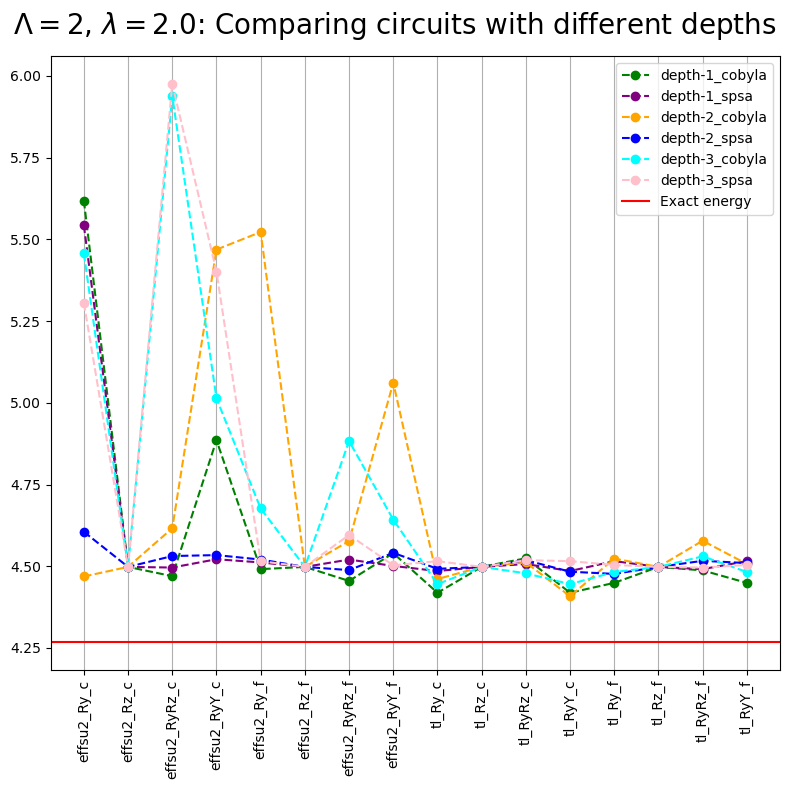

In [36]:
fig, ax = plt.subplots(1,1, figsize = (8,8), tight_layout= True)

ax.plot(df_l20['cobyla_values'],  color='green', marker='o', linestyle='dashed',label='depth-1_cobyla')
ax.plot(df_l20['spsa_values'],  color='purple', marker='o', linestyle='dashed',label = 'depth-1_spsa')
ax.plot(df_l20_2f['cobyla_values'],  color='orange', marker='o', linestyle='dashed',label='depth-2_cobyla')
ax.plot(df_l20_2f['spsa_values'],  color='blue', marker='o', linestyle='dashed',label = 'depth-2_spsa')
ax.plot(df_l20_3f['cobyla_values'],  color='cyan', marker='o', linestyle='dashed',label='depth-3_cobyla')
ax.plot(df_l20_3f['spsa_values'],  color='pink', marker='o', linestyle='dashed',label = 'depth-3_spsa')
ax.axhline(E_20, color = 'red', label='Exact energy')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
#ax.set_title('$\lambda$ = 2.0', fontsize = 18)
#ax.set_ylim([4.2, 4.8])
ax.xaxis.grid(True)
ax.legend(loc = 'upper right')

plt.suptitle('$\Lambda=2$, $\lambda=2.0$: Comparing circuits with different depths', fontsize = 20)
plt.savefig('results/L=2_l=20_all_ansatze_mf.png')